In [1]:
import cv2
import torch
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from datetime import datetime

In [46]:
v = 'v8'

In [47]:
DATETIME_FORMAT = '%Y/%m/%d %H:%M:%S.%f'

In [48]:
def to_datetime(df, col, format=DATETIME_FORMAT, inplace=False):
    if not inplace:
        df = df.copy()
    df[col] = pd.to_datetime(df[col], format=format)
    if not inplace:
        return df

In [49]:
def calc_datetime(start, end=None, format=DATETIME_FORMAT, decimals=2,
                  utc=True, to_ms=False):
    if end is None:
        end = get_timestamp(utc=utc)
    elif isinstance(end, str):
        end = datetime.strptime(end, format)
    if isinstance(start, str):
        start = datetime.strptime(start, format)
    diff = (end - start).total_seconds()
    if to_ms:
        diff *= 1e3
    return round(diff, decimals)

# Only Jetson

In [50]:
scheme1 = 'only-jetson'

In [51]:
jetson_data_sc1 = pd.read_csv(f'{v}/{scheme1}/log_MyJetsonScenario1.csv').drop(0).reset_index(drop=True)

## Jetson

In [52]:
jetson_data_sc1

,asctime,name,topic from,topic to,frame,offset received,frame delay,msg creation delay,consume time,size data received,process time,size data sent,send time,offset sent
0,2022/06/14 08:55:44.646,MyJetsonScenario1,None,final_cam_1,2,-1,-1,0.06,76.78,921.73,144.92,43.37,25.70,11150
1,2022/06/14 08:55:44.765,MyJetsonScenario1,None,final_cam_1,3,-1,-1,0.06,58.44,921.73,91.44,43.40,30.70,11151
2,2022/06/14 08:55:44.883,MyJetsonScenario1,None,final_cam_1,4,-1,-1,0.05,67.74,921.73,98.73,43.22,26.92,11152
3,2022/06/14 08:55:44.998,MyJetsonScenario1,None,final_cam_1,5,-1,-1,0.05,81.43,921.73,94.35,43.12,27.87,11153
4,2022/06/14 08:55:45.114,MyJetsonScenario1,None,final_cam_1,6,-1,-1,0.06,73.07,921.73,95.08,43.21,25.94,11154
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1424,2022/06/14 08:58:18.408,MyJetsonScenario1,None,final_cam_1,1426,-1,-1,0.05,81.47,921.73,86.42,46.42,30.24,12574
1425,2022/06/14 08:58:18.519,MyJetsonScenario1,None,final_cam_1,1427,-1,-1,0.06,61.13,921.73,94.23,46.52,25.07,12575
1426,2022/06/14 08:58:18.630,MyJetsonScenario1,None,final_cam_1,1428,-1,-1,0.05,78.10,921.73,87.41,46.50,25.39,12576
1427,2022/06/14 08:58:18.747,MyJetsonScenario1,None,final_cam_1,1429,-1,-1,0.06,75.64,921.73,87.67,46.44,33.11,12577


In [162]:
_df_sc1_jetson = jetson_data_sc1.sample(n=10).reset_index(drop=True)
_df_sc1_jetson = _df_sc1_jetson[['msg creation delay',
                                 'consume time', 'size data received', 'process time',
                                 'size data sent', 'send time']]
_df_sc1_jetson = _df_sc1_jetson.round(2)
_df_sc1_jetson

,msg creation delay,consume time,size data received,process time,size data sent,send time
0,0.05,72.87,921.73,79.78,45.98,27.60
1,0.05,87.02,921.73,86.96,45.07,25.94
2,0.05,85.83,921.73,89.05,45.35,27.29
3,0.05,94.67,921.73,82.01,45.00,29.16
4,0.06,66.89,921.73,86.56,44.43,26.39
5,0.05,59.02,921.73,85.24,45.00,27.52
6,0.06,78.28,921.73,79.76,45.09,31.71
7,0.05,76.13,921.73,80.82,45.26,31.72
8,0.05,59.35,921.73,80.18,45.04,29.11
9,0.05,69.80,921.73,82.51,45.66,24.74


In [163]:
_p = round(12/(len(_df_sc1_jetson.columns)+1),1)
_f = f'|p{{{_p}cm}}'
print()
print(_df_sc1_jetson.round(2).to_latex(column_format=_f*(len(_df_sc1_jetson.columns) + 1) + '|'))


\begin{tabular}{|p{1.7cm}|p{1.7cm}|p{1.7cm}|p{1.7cm}|p{1.7cm}|p{1.7cm}|p{1.7cm}|}
\toprule
{} &  msg creation delay &  consume time &  size data received &  process time &  size data sent &  send time \\
\midrule
0 &                0.05 &         72.87 &              921.73 &         79.78 &           45.98 &      27.60 \\
1 &                0.05 &         87.02 &              921.73 &         86.96 &           45.07 &      25.94 \\
2 &                0.05 &         85.83 &              921.73 &         89.05 &           45.35 &      27.29 \\
3 &                0.05 &         94.67 &              921.73 &         82.01 &           45.00 &      29.16 \\
4 &                0.06 &         66.89 &              921.73 &         86.56 &           44.43 &      26.39 \\
5 &                0.05 &         59.02 &              921.73 &         85.24 &           45.00 &      27.52 \\
6 &                0.06 &         78.28 &              921.73 &         79.76 &           45.09 &      31.71 \\
7 

## Framerate

In [53]:
a_sc1 = jetson_data_sc1['asctime']
experiment_time_sc1 = calc_datetime(a_sc1[0], a_sc1.iloc[-1])
framerate_sc1 = len(jetson_data_sc1)/experiment_time_sc1
print(f'Framerate for scenario 1 is: {framerate_sc1} FPS')

Framerate for scenario 1 is: 9.266584527592244 FPS


## Delay

In [54]:
delay_sc1_lst = []
data_delay_sc1 = jetson_data_sc1['asctime']
for i in range(len(jetson_data_sc1) - 1):
    delta = calc_datetime(data_delay_sc1.iloc[i], data_delay_sc1.iloc[i + 1], to_ms=True)
    delay_sc1_lst.append(delta)
delay_sc1 = round(np.mean(delay_sc1_lst),2)
print(f'Delay for scenario 1 is: {delay_sc1} ms')

Delay for scenario 1 is: 107.99 ms


# Jetson Kafka

In [55]:
scheme2 = 'jetson-kafka'

In [56]:
input_data_sc2 = pd.read_csv(f'{v}/{scheme2}/log_MyFrameProducer.csv').drop(0).reset_index(drop=True)
jetson_data_sc2 = pd.read_csv(f'{v}/{scheme2}/log_MyJetson.csv').drop(0).reset_index(drop=True)

In [89]:
input_data_sc2

,asctime,name,topic from,topic to,frame,offset received,frame delay,msg creation delay,consume time,size data received,process time,size data sent,send time,offset sent
0,2022/06/14 14:12:24.221,MyFrameProducer,None,input,2,-1,-1,0.69,7.40,921.74,0.01,921.76,76.09,18035
1,2022/06/14 14:12:24.250,MyFrameProducer,None,input,3,-1,-1,50.94,50.80,921.74,0.01,921.76,52.13,17432
2,2022/06/14 14:12:24.284,MyFrameProducer,None,input,4,-1,-1,58.87,62.90,921.74,0.01,921.76,24.35,17433
3,2022/06/14 14:12:24.362,MyFrameProducer,None,input,5,-1,-1,77.38,79.64,921.74,0.01,921.76,21.99,18036
4,2022/06/14 14:12:24.454,MyFrameProducer,None,input,6,-1,-1,76.82,79.75,921.74,0.01,921.76,31.21,18037
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1701,2022/06/14 14:14:41.168,MyFrameProducer,None,input,1703,-1,-1,76.42,79.30,921.74,0.01,921.76,21.89,18897
1702,2022/06/14 14:14:41.244,MyFrameProducer,None,input,1704,-1,-1,77.56,79.95,921.74,0.01,921.76,17.07,18898
1703,2022/06/14 14:14:41.324,MyFrameProducer,None,input,1705,-1,-1,75.79,79.46,921.74,0.01,921.76,18.45,18899
1704,2022/06/14 14:14:41.411,MyFrameProducer,None,input,1706,-1,-1,76.67,79.89,921.74,0.01,921.76,25.02,18271


## jetson

In [57]:
jetson_data_sc2

,asctime,name,topic from,topic to,frame,offset received,frame delay,msg creation delay,consume time,size data received,process time,size data sent,send time,offset sent
0,2022/06/14 07:12:35.038,MyJetson,input,final_cam_1,130,18098,421.59,422.50,63.89,921.73,198.20,45.06,26.89,10126
1,2022/06/14 07:12:35.189,MyJetson,input,final_cam_1,137,18103,82.94,84.02,18.59,921.73,131.77,45.33,26.79,10127
2,2022/06/14 07:12:35.323,MyJetson,input,final_cam_1,139,18105,74.72,74.88,81.81,921.73,111.74,45.41,27.53,10128
3,2022/06/14 07:12:35.478,MyJetson,input,final_cam_1,140,18106,128.08,128.71,66.42,921.73,131.09,45.39,30.18,10129
4,2022/06/14 07:12:35.640,MyJetson,input,final_cam_1,141,17499,201.01,202.04,150.33,921.73,135.10,45.31,35.47,10130
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1018,2022/06/14 07:14:41.420,MyJetson,input,final_cam_1,1703,18897,126.12,126.73,87.69,921.73,103.11,53.30,26.30,11144
1019,2022/06/14 07:14:41.550,MyJetson,input,final_cam_1,1705,18899,89.39,90.10,52.19,921.73,106.15,53.45,30.48,11145
1020,2022/06/14 07:14:41.659,MyJetson,input,final_cam_1,1706,18271,135.79,136.64,123.01,921.73,93.52,53.09,25.72,11146
1021,2022/06/14 07:14:41.768,MyJetson,input,final_cam_1,1707,18272,169.22,169.44,90.77,921.73,88.03,53.49,26.19,11147


## Framerate

In [58]:
a_sc2 = jetson_data_sc2['asctime']
experiment_time_sc2 = calc_datetime(a_sc2.iloc[0], a_sc2.iloc[-1])
framerate_sc2 = len(jetson_data_sc2)/experiment_time_sc2
print(f'Framerate for scenario 2 is: {framerate_sc2} FPS')

Framerate for scenario 2 is: 8.066551017189719 FPS


## Delay

In [59]:
jetson_data_sc2['total delay'] = jetson_data_sc2['frame delay'] + \
                                 jetson_data_sc2['process time'] + \
                                 jetson_data_sc2['send time']

In [60]:
jetson_data_sc2

,asctime,name,topic from,topic to,frame,offset received,frame delay,msg creation delay,consume time,size data received,process time,size data sent,send time,offset sent,total delay
0,2022/06/14 07:12:35.038,MyJetson,input,final_cam_1,130,18098,421.59,422.50,63.89,921.73,198.20,45.06,26.89,10126,646.68
1,2022/06/14 07:12:35.189,MyJetson,input,final_cam_1,137,18103,82.94,84.02,18.59,921.73,131.77,45.33,26.79,10127,241.50
2,2022/06/14 07:12:35.323,MyJetson,input,final_cam_1,139,18105,74.72,74.88,81.81,921.73,111.74,45.41,27.53,10128,213.99
3,2022/06/14 07:12:35.478,MyJetson,input,final_cam_1,140,18106,128.08,128.71,66.42,921.73,131.09,45.39,30.18,10129,289.35
4,2022/06/14 07:12:35.640,MyJetson,input,final_cam_1,141,17499,201.01,202.04,150.33,921.73,135.10,45.31,35.47,10130,371.58
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1018,2022/06/14 07:14:41.420,MyJetson,input,final_cam_1,1703,18897,126.12,126.73,87.69,921.73,103.11,53.30,26.30,11144,255.53
1019,2022/06/14 07:14:41.550,MyJetson,input,final_cam_1,1705,18899,89.39,90.10,52.19,921.73,106.15,53.45,30.48,11145,226.02
1020,2022/06/14 07:14:41.659,MyJetson,input,final_cam_1,1706,18271,135.79,136.64,123.01,921.73,93.52,53.09,25.72,11146,255.03
1021,2022/06/14 07:14:41.768,MyJetson,input,final_cam_1,1707,18272,169.22,169.44,90.77,921.73,88.03,53.49,26.19,11147,283.44


In [61]:
delay_sc2 = jetson_data_sc2['total delay'].mean()
print(f'Delay for scenario 2 is: {delay_sc2} ms')

Delay for scenario 2 is: 255.10016617790816 ms


# Worker Cloud + Kafka Cloud

In [62]:
scheme3 = 'worker-cloud-kafka'

In [63]:
input_data_sc3 = pd.read_csv(f'{v}/{scheme3}/log_MyFrameProducer.csv').drop(0).reset_index(drop=True)
cloud_data_sc3 = pd.read_csv(f'{v}/{scheme3}/log_MyCloud.csv').drop(0).reset_index(drop=True)

In [64]:
input_data_sc3

,asctime,name,topic from,topic to,frame,offset received,frame delay,msg creation delay,consume time,size data received,process time,size data sent,send time,offset sent
0,2022/06/14 14:51:11.022,MyFrameProducer,None,input,3,-1,-1,73.37,76.83,921.74,0.01,921.76,1901.37,263
1,2022/06/14 14:51:11.025,MyFrameProducer,None,input,2,-1,-1,72.95,80.76,921.74,0.01,921.76,1982.07,276
2,2022/06/14 14:51:12.386,MyFrameProducer,None,input,4,-1,-1,74.25,77.67,921.74,0.01,921.76,3185.21,264
3,2022/06/14 14:51:12.388,MyFrameProducer,None,input,5,-1,-1,0.02,83.12,921.74,0.01,921.76,2704.71,277
4,2022/06/14 14:51:13.827,MyFrameProducer,None,input,7,-1,-1,0.02,79.27,921.74,0.01,921.76,2778.68,265
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
167,2022/06/14 14:53:14.615,MyFrameProducer,None,input,169,-1,-1,0.02,79.81,921.74,1.37,921.76,3064.94,364
168,2022/06/14 14:53:15.990,MyFrameProducer,None,input,170,-1,-1,7.16,80.12,921.74,0.01,921.76,4428.39,342
169,2022/06/14 14:53:15.993,MyFrameProducer,None,input,171,-1,-1,0.02,81.14,921.74,0.01,921.76,3044.13,365
170,2022/06/14 14:53:16.682,MyFrameProducer,None,input,172,-1,-1,53.38,77.59,921.74,0.01,921.76,3676.64,343


In [110]:
_df_sc3 = input_data_sc3[['msg creation delay','consume time','size data received','process time','size data sent','send time']].describe()
_df_sc3

,msg creation delay,consume time,size data received,process time,size data sent,send time
count,172.000000,172.000000,1.720000e+02,172.000000,1.720000e+02,172.000000
mean,10.735058,80.812733,9.217400e+02,0.039826,9.217600e+02,3161.952326
std,19.763418,3.929712,3.420563e-13,0.190939,3.420563e-13,719.220048
min,0.010000,76.110000,9.217400e+02,0.010000,9.217600e+02,1901.370000
25%,0.020000,79.287500,9.217400e+02,0.010000,9.217600e+02,2721.875000
50%,0.020000,79.600000,9.217400e+02,0.010000,9.217600e+02,3018.055000
75%,12.152500,80.132500,9.217400e+02,0.010000,9.217600e+02,3699.562500
max,74.250000,106.910000,9.217400e+02,1.880000,9.217600e+02,4653.950000


In [117]:
_p = round(12/(len(_df_sc3.columns)+1),1)
_f = f'|p{{{_p}cm}}'
print()
print(_df_sc3.round(2).to_latex(column_format=_f*(len(_df_sc3.columns) + 1) + '|'))


\begin{tabular}{|p{1.7cm}|p{1.7cm}|p{1.7cm}|p{1.7cm}|p{1.7cm}|p{1.7cm}|p{1.7cm}|}
\toprule
{} &  msg creation delay &  consume time &  size data received &  process time &  size data sent &  send time \\
\midrule
count &              172.00 &        172.00 &              172.00 &        172.00 &          172.00 &     172.00 \\
mean  &               10.74 &         80.81 &              921.74 &          0.04 &          921.76 &    3161.95 \\
std   &               19.76 &          3.93 &                0.00 &          0.19 &            0.00 &     719.22 \\
min   &                0.01 &         76.11 &              921.74 &          0.01 &          921.76 &    1901.37 \\
25\%   &                0.02 &         79.29 &              921.74 &          0.01 &          921.76 &    2721.88 \\
50\%   &                0.02 &         79.60 &              921.74 &          0.01 &          921.76 &    3018.06 \\
75\%   &               12.15 &         80.13 &              921.74 &          0.01 &    

## cloud

In [65]:
cloud_data_sc3

,asctime,name,topic from,topic to,frame,offset received,frame delay,msg creation delay,consume time,size data received,process time,size data sent,send time,offset sent
0,2022/06/14 07:51:11.207,MyCloud,input,final_cam_1,2,276,2041.48,2042.02,0.86,921.74,109.97,42.64,5.84,264
1,2022/06/14 07:51:12.625,MyCloud,input,final_cam_1,5,277,2790.71,2791.08,0.94,921.74,130.94,44.02,11.97,265
2,2022/06/14 07:51:14.141,MyCloud,input,final_cam_1,7,265,2966.79,2967.61,0.86,921.74,107.81,44.06,10.00,266
3,2022/06/14 07:51:15.029,MyCloud,input,final_cam_1,8,266,3848.61,2501.35,886.39,921.74,114.34,44.08,5.02,267
4,2022/06/14 07:51:16.115,MyCloud,input,final_cam_1,9,267,3570.39,2137.82,0.92,921.74,117.72,45.02,10.23,268
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
105,2022/06/14 07:53:13.123,MyCloud,input,final_cam_1,167,363,3087.99,3087.98,0.83,921.74,112.82,47.62,10.46,369
106,2022/06/14 07:53:14.832,MyCloud,input,final_cam_1,168,341,4745.00,3160.81,0.87,921.74,109.67,47.56,10.22,370
107,2022/06/14 07:53:16.171,MyCloud,input,final_cam_1,171,365,3099.33,3100.08,0.89,921.74,106.60,47.38,9.33,371
108,2022/06/14 07:53:16.888,MyCloud,input,final_cam_1,172,343,3747.95,2131.81,704.58,921.74,121.66,47.46,5.35,372


In [118]:
cloud_data_sc3.describe()

,frame,offset received,frame delay,msg creation delay,consume time,size data received,process time,size data sent,send time,offset sent,total delay
count,110.000000,110.000000,110.000000,110.000000,110.000000,1.100000e+02,110.000000,110.000000,110.000000,110.000000,110.000000
mean,88.545455,312.945455,3253.702364,2411.993545,323.104455,9.217400e+02,116.771091,46.366091,9.333818,318.500000,3379.807273
std,49.340539,25.436316,740.433352,542.188100,383.409771,1.370486e-12,11.939247,0.838883,3.142929,31.898276,739.980001
min,2.000000,265.000000,2041.480000,1421.740000,0.810000,9.217400e+02,96.010000,42.640000,4.660000,264.000000,2157.290000
25%,47.250000,294.000000,2783.495000,2137.550000,0.870000,9.217400e+02,109.445000,45.962500,6.362500,291.250000,2920.820000
50%,87.500000,313.500000,3090.070000,2386.570000,0.985000,9.217400e+02,113.620000,46.475000,9.715000,318.500000,3214.860000
75%,132.500000,334.000000,3771.702500,2935.335000,694.395000,9.217400e+02,124.492500,46.987500,10.987500,345.750000,3906.810000
max,173.000000,365.000000,4745.000000,3282.250000,1028.180000,9.217400e+02,176.330000,47.620000,28.160000,373.000000,4864.890000


In [159]:
_df_sc3_cloud = cloud_data_sc3[['frame delay','consume time','size data received','process time','size data sent','send time']].describe()
_df_sc3_cloud

,frame delay,consume time,size data received,process time,size data sent,send time
count,110.000000,110.000000,1.100000e+02,110.000000,110.000000,110.000000
mean,3253.702364,323.104455,9.217400e+02,116.771091,46.366091,9.333818
std,740.433352,383.409771,1.370486e-12,11.939247,0.838883,3.142929
min,2041.480000,0.810000,9.217400e+02,96.010000,42.640000,4.660000
25%,2783.495000,0.870000,9.217400e+02,109.445000,45.962500,6.362500
50%,3090.070000,0.985000,9.217400e+02,113.620000,46.475000,9.715000
75%,3771.702500,694.395000,9.217400e+02,124.492500,46.987500,10.987500
max,4745.000000,1028.180000,9.217400e+02,176.330000,47.620000,28.160000


In [160]:
_p = round(12/(len(_df_sc3_cloud.columns)+1),1)
_f = f'|p{{{_p}cm}}'
print()
print(_df_sc3_cloud.round(2).to_latex(column_format=_f*(len(_df_sc3_cloud.columns) + 1) + '|'))


\begin{tabular}{|p{1.7cm}|p{1.7cm}|p{1.7cm}|p{1.7cm}|p{1.7cm}|p{1.7cm}|p{1.7cm}|}
\toprule
{} &  frame delay &  consume time &  size data received &  process time &  size data sent &  send time \\
\midrule
count &       110.00 &        110.00 &              110.00 &        110.00 &          110.00 &     110.00 \\
mean  &      3253.70 &        323.10 &              921.74 &        116.77 &           46.37 &       9.33 \\
std   &       740.43 &        383.41 &                0.00 &         11.94 &            0.84 &       3.14 \\
min   &      2041.48 &          0.81 &              921.74 &         96.01 &           42.64 &       4.66 \\
25\%   &      2783.50 &          0.87 &              921.74 &        109.44 &           45.96 &       6.36 \\
50\%   &      3090.07 &          0.98 &              921.74 &        113.62 &           46.47 &       9.72 \\
75\%   &      3771.70 &        694.40 &              921.74 &        124.49 &           46.99 &      10.99 \\
max   &      4745.00 &     

## Framerate

In [66]:
a_sc3 = cloud_data_sc3['asctime']
experiment_time_sc3 = calc_datetime(a_sc3.iloc[0], a_sc3.iloc[-1])
framerate_sc3 = len(cloud_data_sc3)/experiment_time_sc3
print(f'Framerate for scenario 2 is: {framerate_sc3} FPS')

Framerate for scenario 2 is: 0.8705975464978235 FPS


## Delay

In [67]:
cloud_data_sc3['total delay'] = cloud_data_sc3['frame delay'] + \
                                cloud_data_sc3['process time'] + \
                                cloud_data_sc3['send time']

In [68]:
cloud_data_sc3

,asctime,name,topic from,topic to,frame,offset received,frame delay,msg creation delay,consume time,size data received,process time,size data sent,send time,offset sent,total delay
0,2022/06/14 07:51:11.207,MyCloud,input,final_cam_1,2,276,2041.48,2042.02,0.86,921.74,109.97,42.64,5.84,264,2157.29
1,2022/06/14 07:51:12.625,MyCloud,input,final_cam_1,5,277,2790.71,2791.08,0.94,921.74,130.94,44.02,11.97,265,2933.62
2,2022/06/14 07:51:14.141,MyCloud,input,final_cam_1,7,265,2966.79,2967.61,0.86,921.74,107.81,44.06,10.00,266,3084.60
3,2022/06/14 07:51:15.029,MyCloud,input,final_cam_1,8,266,3848.61,2501.35,886.39,921.74,114.34,44.08,5.02,267,3967.97
4,2022/06/14 07:51:16.115,MyCloud,input,final_cam_1,9,267,3570.39,2137.82,0.92,921.74,117.72,45.02,10.23,268,3698.34
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
105,2022/06/14 07:53:13.123,MyCloud,input,final_cam_1,167,363,3087.99,3087.98,0.83,921.74,112.82,47.62,10.46,369,3211.27
106,2022/06/14 07:53:14.832,MyCloud,input,final_cam_1,168,341,4745.00,3160.81,0.87,921.74,109.67,47.56,10.22,370,4864.89
107,2022/06/14 07:53:16.171,MyCloud,input,final_cam_1,171,365,3099.33,3100.08,0.89,921.74,106.60,47.38,9.33,371,3215.26
108,2022/06/14 07:53:16.888,MyCloud,input,final_cam_1,172,343,3747.95,2131.81,704.58,921.74,121.66,47.46,5.35,372,3874.96


In [69]:
delay_sc3 = cloud_data_sc3['total delay'].mean()
print(f'Delay for scenario 2 is: {delay_sc3} ms')

Delay for scenario 2 is: 3379.807272727274 ms


# Fog Cloud

In [70]:
scheme4 = 'fog-cloud'

In [71]:
input_data_sc4 = pd.read_csv(f'{v}/{scheme4}/log_MyFrameProducer.csv').drop(0).reset_index(drop=True)
preprocess_data_sc4 = pd.read_csv(f'{v}/{scheme4}/log_MyPreprocess.csv').drop(0).reset_index(drop=True)
cloud_data_sc4 = pd.read_csv(f'{v}/{scheme4}/log_MyCloud.csv').drop(0).reset_index(drop=True)
jetson_data_sc4 = pd.read_csv(f'{v}/{scheme4}/log_MyJetson.csv').drop(0).reset_index(drop=True)
forwarder_data_sc4 = pd.read_csv(f'{v}/{scheme4}/log_MyForwarder.csv').drop(0).reset_index(drop=True)
merger_data_sc4 = pd.read_csv(f'{v}/{scheme4}/log_MyMerger.csv')

merger_data_sc4 = merger_data_sc4[merger_data_sc4['frame'] != 1] # the first frame is an outlier

## Merger

In [72]:
merger_data_sc4

,asctime,name,topic from,topic to,frame,offset received,frame delay,msg creation delay,consume time,size data received,process time,size data sent,send time,offset sent
0,2022/06/14 05:54:35.257,MyMerger,input,final_cam_1,2,12854,80.76,82.64,728117.77,921.74,0.02,921.76,48.49,4350
2,2022/06/14 05:54:35.391,MyMerger,input,final_cam_1,5,12855,60.36,61.04,86.54,921.74,0.01,921.76,51.89,4352
3,2022/06/14 05:54:35.440,MyMerger,input,final_cam_1,3,12486,193.75,194.23,18.24,921.74,0.01,921.76,77.25,4353
4,2022/06/14 05:54:35.465,MyMerger,input,final_cam_1,6,12856,98.59,98.67,61.61,921.74,0.01,921.76,35.30,4354
5,2022/06/14 05:54:35.532,MyMerger,input,final_cam_1,4,12487,288.26,288.30,75.10,921.74,0.01,921.76,21.28,4355
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3324,2022/06/14 05:57:05.709,MyMerger,result,final_cam_1,2538,2399,1037.44,522.92,2.89,361.12,0.01,361.17,83.10,7674
3325,2022/06/14 05:57:05.726,MyMerger,input,final_cam_1,2538,13721,1116.47,1116.95,51.87,921.74,0.01,921.76,21.99,7675
3326,2022/06/14 05:57:05.867,MyMerger,result,final_cam_1,2518,2400,2385.05,274.58,155.33,0.13,0.01,0.32,4.60,7676
3327,2022/06/14 05:57:07.129,MyMerger,result,final_cam_1,2537,2401,2053.89,6.25,705.81,0.13,0.01,0.32,556.36,7677


## Merger Data from Jetson

In [73]:
from_result = merger_data_sc4['topic from'] == 'result'
bt_200 = merger_data_sc4['size data received'] > 200
merger_data_sc4_jetson = (merger_data_sc4[from_result & bt_200]).copy()
merger_data_sc4_jetson

,asctime,name,topic from,topic to,frame,offset received,frame delay,msg creation delay,consume time,size data received,process time,size data sent,send time,offset sent
205,2022/06/14 05:54:45.349,MyMerger,result,final_cam_1,164,1009,1109.27,137.14,0.34,360.80,0.02,360.85,45.23,4555
210,2022/06/14 05:54:45.581,MyMerger,result,final_cam_1,166,1010,1228.60,168.20,0.32,361.06,0.02,361.11,54.48,4560
213,2022/06/14 05:54:45.660,MyMerger,result,final_cam_1,168,1012,1180.02,89.76,0.31,360.85,0.01,360.90,72.42,4563
216,2022/06/14 05:54:45.842,MyMerger,result,final_cam_1,170,1013,1238.18,117.84,45.27,361.15,0.01,361.20,83.60,4566
221,2022/06/14 05:54:46.006,MyMerger,result,final_cam_1,173,1015,1234.38,131.49,0.81,360.69,0.01,360.74,89.39,4571
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3313,2022/06/14 05:57:04.803,MyMerger,result,final_cam_1,2528,2394,702.75,148.86,15.19,360.87,0.01,360.92,68.99,7663
3318,2022/06/14 05:57:05.467,MyMerger,result,final_cam_1,2531,2396,708.41,187.91,0.36,360.80,0.02,360.85,567.04,7668
3321,2022/06/14 05:57:05.608,MyMerger,result,final_cam_1,2532,2397,1300.38,693.62,10.98,360.86,0.01,360.90,62.92,7671
3322,2022/06/14 05:57:05.627,MyMerger,result,final_cam_1,2534,2398,1192.90,566.43,0.28,360.99,0.01,361.04,79.13,7672


In [157]:
_df_sc4_jetson = merger_data_sc4_jetson.sample(n=10).reset_index(drop=True)
_df_sc4_jetson = _df_sc4_jetson[['frame delay',
                                 'consume time', 'size data received', 'process time',
                                 'size data sent', 'send time']]
_df_sc4_jetson = _df_sc4_jetson.round(2)
_df_sc4_jetson

,frame delay,consume time,size data received,process time,size data sent,send time
0,3392.76,0.37,361.06,0.01,361.11,90.03
1,524.48,14.27,361.19,0.01,361.24,53.11
2,1007.15,0.52,361.33,0.02,361.38,63.10
3,1428.15,0.42,360.92,0.01,360.96,148.41
4,2250.07,62.36,360.76,0.01,360.81,25.19
5,1603.16,10.07,361.11,0.03,361.16,454.75
6,1348.83,0.35,361.06,0.01,361.11,30.57
7,696.67,40.01,361.05,0.01,361.10,45.14
8,1171.22,35.40,361.29,0.01,361.34,20.85
9,2886.64,0.37,360.88,0.01,360.93,465.32


In [158]:
_p = round(12/(len(_df_sc4_jetson.columns)+1),1)
_f = f'|p{{{_p}cm}}'
print()
print(_df_sc4_jetson.round(2).to_latex(column_format=_f*(len(_df_sc4_jetson.columns) + 1) + '|'))


\begin{tabular}{|p{1.7cm}|p{1.7cm}|p{1.7cm}|p{1.7cm}|p{1.7cm}|p{1.7cm}|p{1.7cm}|}
\toprule
{} &  frame delay &  consume time &  size data received &  process time &  size data sent &  send time \\
\midrule
0 &      3392.76 &          0.37 &              361.06 &          0.01 &          361.11 &      90.03 \\
1 &       524.48 &         14.27 &              361.19 &          0.01 &          361.24 &      53.11 \\
2 &      1007.15 &          0.52 &              361.33 &          0.02 &          361.38 &      63.10 \\
3 &      1428.15 &          0.42 &              360.92 &          0.01 &          360.96 &     148.41 \\
4 &      2250.07 &         62.36 &              360.76 &          0.01 &          360.81 &      25.19 \\
5 &      1603.16 &         10.07 &              361.11 &          0.03 &          361.16 &     454.75 \\
6 &      1348.83 &          0.35 &              361.06 &          0.01 &          361.11 &      30.57 \\
7 &       696.67 &         40.01 &              361.05 &  

## Merger Data from Cloud

In [74]:
lt_200 = merger_data_sc4['size data received'] < 200
merger_data_sc4_cloud = (merger_data_sc4[from_result & lt_200]).copy()
merger_data_sc4_cloud

,asctime,name,topic from,topic to,frame,offset received,frame delay,msg creation delay,consume time,size data received,process time,size data sent,send time,offset sent
20,2022/06/14 05:54:36.396,MyMerger,result,final_cam_1,2,968,1238.56,91.25,30.65,0.13,0.01,0.32,38.96,4370
21,2022/06/14 05:54:36.403,MyMerger,result,final_cam_1,5,969,1123.66,20.28,22.44,0.13,0.01,0.32,3.96,4371
26,2022/06/14 05:54:36.623,MyMerger,result,final_cam_1,6,970,1246.59,99.64,0.14,0.13,0.01,0.32,46.96,4376
27,2022/06/14 05:54:36.626,MyMerger,result,final_cam_1,10,971,1066.98,50.20,14.20,0.13,0.01,0.32,10.44,4377
29,2022/06/14 05:54:36.768,MyMerger,result,final_cam_1,12,972,1073.83,8.32,46.96,0.13,0.01,0.32,15.42,4379
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3290,2022/06/14 05:57:03.751,MyMerger,result,final_cam_1,2487,2386,2000.79,32.22,63.26,0.13,0.01,0.32,24.59,7640
3314,2022/06/14 05:57:04.817,MyMerger,result,final_cam_1,2504,2395,2081.56,94.81,0.08,0.13,0.01,0.32,83.03,7664
3326,2022/06/14 05:57:05.867,MyMerger,result,final_cam_1,2518,2400,2385.05,274.58,155.33,0.13,0.01,0.32,4.60,7676
3327,2022/06/14 05:57:07.129,MyMerger,result,final_cam_1,2537,2401,2053.89,6.25,705.81,0.13,0.01,0.32,556.36,7677


In [155]:
_df_sc4_cloud = merger_data_sc4_cloud.sample(n=10).reset_index(drop=True)
_df_sc4_cloud = _df_sc4_cloud[['frame delay',
                                 'consume time', 'size data received', 'process time',
                                 'size data sent', 'send time']]
_df_sc4_cloud = _df_sc4_cloud.round(2)
_df_sc4_cloud

,frame delay,consume time,size data received,process time,size data sent,send time
0,998.65,18.11,0.13,0.01,0.32,16.38
1,1223.66,0.09,0.13,0.01,0.32,69.82
2,1063.86,21.61,0.13,0.01,0.32,57.24
3,1060.03,12.61,0.13,0.02,0.32,67.18
4,1040.43,44.81,0.13,0.01,0.32,5.30
5,858.84,0.12,0.13,0.01,0.32,25.86
6,2337.62,0.17,0.13,0.02,0.32,191.98
7,2415.76,0.15,0.13,0.02,0.32,64.72
8,1347.42,0.10,0.13,0.01,0.32,29.15
9,1113.26,28.62,0.13,0.02,0.32,23.75


In [156]:
_p = round(12/(len(_df_sc4_cloud.columns)+1),1)
_f = f'|p{{{_p}cm}}'
print()
print(_df_sc4_cloud.round(2).to_latex(column_format=_f*(len(_df_sc4_cloud.columns) + 1) + '|'))


\begin{tabular}{|p{1.7cm}|p{1.7cm}|p{1.7cm}|p{1.7cm}|p{1.7cm}|p{1.7cm}|p{1.7cm}|}
\toprule
{} &  frame delay &  consume time &  size data received &  process time &  size data sent &  send time \\
\midrule
0 &       998.65 &         18.11 &                0.13 &          0.01 &            0.32 &      16.38 \\
1 &      1223.66 &          0.09 &                0.13 &          0.01 &            0.32 &      69.82 \\
2 &      1063.86 &         21.61 &                0.13 &          0.01 &            0.32 &      57.24 \\
3 &      1060.03 &         12.61 &                0.13 &          0.02 &            0.32 &      67.18 \\
4 &      1040.43 &         44.81 &                0.13 &          0.01 &            0.32 &       5.30 \\
5 &       858.84 &          0.12 &                0.13 &          0.01 &            0.32 &      25.86 \\
6 &      2337.62 &          0.17 &                0.13 &          0.02 &            0.32 &     191.98 \\
7 &      2415.76 &          0.15 &                0.13 &  

## Framerate

In [75]:
asctime_sc4_jetson = merger_data_sc4_jetson['asctime']
experiment_time_sc4_jetson = calc_datetime(asctime_sc4_jetson.iloc[0], asctime_sc4_jetson.iloc[-1])
framerate_sc4_jetson = len(merger_data_sc4_jetson)/experiment_time_sc4_jetson
print(f'Framerate from Jetson in scenario 4 is: {framerate_sc4_jetson} FPS')

Framerate from Jetson in scenario 4 is: 7.288401253918495 FPS


In [76]:
asctime_sc4_cloud = merger_data_sc4_cloud['asctime']
experiment_time_sc4_cloud = calc_datetime(asctime_sc4_cloud.iloc[0], asctime_sc4_cloud.iloc[-1])
framerate_sc4_cloud = len(merger_data_sc4_cloud)/experiment_time_sc4_cloud
print(f'Framerate from Cloud in scenario 4 is: {framerate_sc4_cloud} FPS')

Framerate from Cloud in scenario 4 is: 2.7121552065461265 FPS


In [77]:
framerate_sc4 = framerate_sc4_jetson + framerate_sc4_cloud
print(f'Framerate for scenario 4 is: {framerate_sc4} FPS')

Framerate for scenario 4 is: 10.00055646046462 FPS


## Delay

In [78]:
merger_data_sc4_jetson_cloud = pd.concat([merger_data_sc4_jetson,merger_data_sc4_cloud])\
                                 .reset_index(drop=True)

In [79]:
merger_data_sc4_jetson_cloud['total delay'] = merger_data_sc4_jetson_cloud['frame delay'] + \
                                              merger_data_sc4_jetson_cloud['process time'] + \
                                              merger_data_sc4_jetson_cloud['send time']

In [80]:
merger_data_sc4_jetson_cloud

,asctime,name,topic from,topic to,frame,offset received,frame delay,msg creation delay,consume time,size data received,process time,size data sent,send time,offset sent,total delay
0,2022/06/14 05:54:45.349,MyMerger,result,final_cam_1,164,1009,1109.27,137.14,0.34,360.80,0.02,360.85,45.23,4555,1154.52
1,2022/06/14 05:54:45.581,MyMerger,result,final_cam_1,166,1010,1228.60,168.20,0.32,361.06,0.02,361.11,54.48,4560,1283.10
2,2022/06/14 05:54:45.660,MyMerger,result,final_cam_1,168,1012,1180.02,89.76,0.31,360.85,0.01,360.90,72.42,4563,1252.45
3,2022/06/14 05:54:45.842,MyMerger,result,final_cam_1,170,1013,1238.18,117.84,45.27,361.15,0.01,361.20,83.60,4566,1321.79
4,2022/06/14 05:54:46.006,MyMerger,result,final_cam_1,173,1015,1234.38,131.49,0.81,360.69,0.01,360.74,89.39,4571,1323.78
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1429,2022/06/14 05:57:03.751,MyMerger,result,final_cam_1,2487,2386,2000.79,32.22,63.26,0.13,0.01,0.32,24.59,7640,2025.39
1430,2022/06/14 05:57:04.817,MyMerger,result,final_cam_1,2504,2395,2081.56,94.81,0.08,0.13,0.01,0.32,83.03,7664,2164.60
1431,2022/06/14 05:57:05.867,MyMerger,result,final_cam_1,2518,2400,2385.05,274.58,155.33,0.13,0.01,0.32,4.60,7676,2389.66
1432,2022/06/14 05:57:07.129,MyMerger,result,final_cam_1,2537,2401,2053.89,6.25,705.81,0.13,0.01,0.32,556.36,7677,2610.26


In [81]:
delay_sc4 = merger_data_sc4_jetson_cloud['total delay'].mean()
print(f'Delay for scenario 4 is: {delay_sc4} ms')

Delay for scenario 4 is: 1717.2389679218988 ms


# Comparison

In [82]:
compare = pd.DataFrame([
    {'scenario':'Hanya Jetson', 'framerate (FPS)': framerate_sc1, 'delay (ms)': delay_sc1},
    {'scenario':'Jetson dengan Kafka Lokal', 'framerate (FPS)': framerate_sc2, 'delay (ms)': delay_sc2},
    {'scenario':'Worker Cloud dengan Kafka Cloud', 'framerate (FPS)': framerate_sc3, 'delay (ms)': delay_sc3},
    {'scenario':'Kombinasi dari Fog dan Cloud', 'framerate (FPS)': framerate_sc4, 'delay (ms)': delay_sc4},
])
compare.set_index('scenario').round(2)

,framerate (FPS),delay (ms)
scenario,,
Hanya Jetson,9.27,107.99
Jetson dengan Kafka Lokal,8.07,255.10
Worker Cloud dengan Kafka Cloud,0.87,3379.81
Kombinasi dari Fog dan Cloud,10.00,1717.24


In [91]:
plotting_framerate = pd.DataFrame([
    {'Scenario':'Skenario 1', 'Metrik': 'Framerate', 'Framerate': framerate_sc1},
    {'Scenario':'Skenario 2', 'Metrik': 'Framerate', 'Framerate': framerate_sc2},
    {'Scenario':'Skenario 3', 'Metrik': 'Framerate', 'Framerate': framerate_sc3},
    {'Scenario':'Skenario 4', 'Metrik': 'Framerate', 'Framerate': framerate_sc4},
]).round(2)
plotting_delay = pd.DataFrame([
    {'Scenario':'Skenario 1', 'Metrik': 'Delay', 'Delay': delay_sc1},
    {'Scenario':'Skenario 2', 'Metrik': 'Delay', 'Delay': delay_sc2},
    {'Scenario':'Skenario 3', 'Metrik': 'Delay', 'Delay': delay_sc3},
    {'Scenario':'Skenario 4', 'Metrik': 'Delay', 'Delay': delay_sc4},
]).round(2)

In [92]:
plotting_framerate

,Scenario,Metrik,Framerate
0,Skenario 1,Framerate,9.27
1,Skenario 2,Framerate,8.07
2,Skenario 3,Framerate,0.87
3,Skenario 4,Framerate,10.00


In [93]:
plotting_delay

,Scenario,Metrik,Delay
0,Skenario 1,Delay,107.99
1,Skenario 2,Delay,255.10
2,Skenario 3,Delay,3379.81
3,Skenario 4,Delay,1717.24


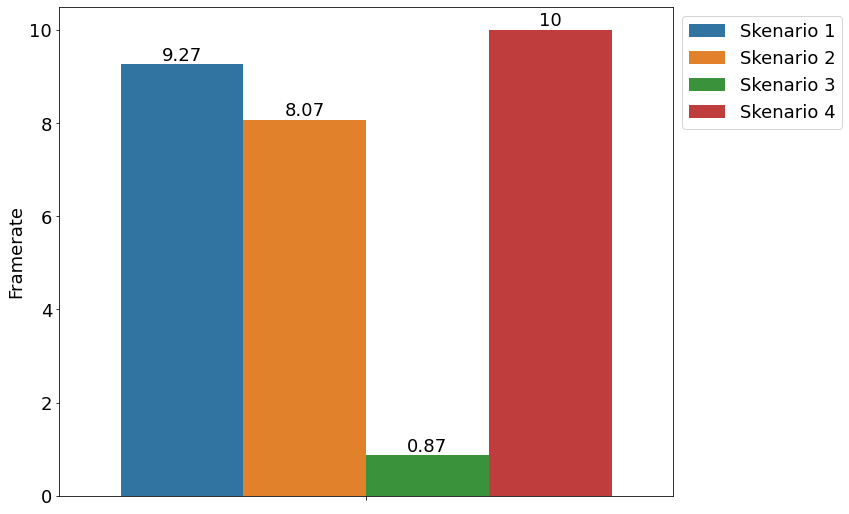

In [94]:
plt.rcParams.update({'font.size': 18})
plt.figure(figsize=(11,9))
ax_framerate = sns.barplot(data=plotting_framerate, x='Metrik', y='Framerate', hue='Scenario')
ax_framerate.set(xticklabels=[])
ax_framerate.set(xlabel=None)
# ax_framerate.set(title='Perbandingan Metrik Framerate (FPS) untuk Keempat Skenario\n(Lebih Tinggi Lebih Baik)')
for i in ax_framerate.containers:
    ax_framerate.bar_label(i,)
ax_framerate.legend(bbox_to_anchor=(1, 1), loc='upper left')
plt.show()

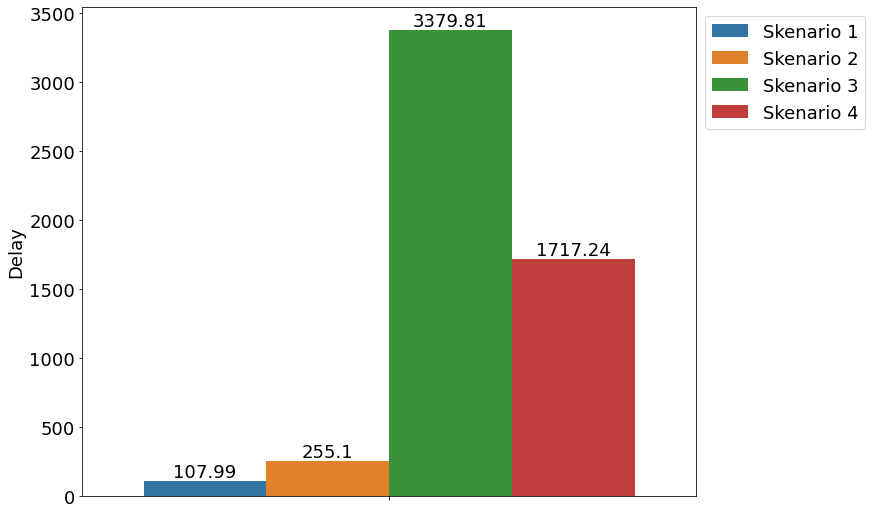

In [95]:
plt.figure(figsize=(11,9))
ax_delay = sns.barplot(data=plotting_delay, x='Metrik', y='Delay', hue='Scenario')
ax_delay.set(xticklabels=[])
ax_delay.set(xlabel=None)
# ax_delay.set(title='Perbandingan Metrik Delay (Milliseconds) untuk Keempat Skenario\n(Lebih Rendah Lebih Baik)')
for i in ax_delay.containers:
    ax_delay.bar_label(i,)
ax_delay.legend(bbox_to_anchor=(1, 1), loc='upper left')
plt.show()